<a href="https://colab.research.google.com/github/subodhsd/Play-Store-Analysis/blob/main/Play_Store_App_Review_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Play Store App Review Analysis

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

   Nowadays, mobile apps are becoming one of the most fundamental parts of our life. With the rapid increase in app usage, The app market is also growing exponentially. Currently, the Google play store is the most dominant android app marketplace. At this time, It contains more than 2.5 million apps and thousands of apps are launched every single day.

   Since a number of the dominant player with several quality apps are already present in the market, there is tough competition for newcomers. To survive and grow in this competitive market we need a great strategy. We have to find some answers from previous market insights. For example- in which niche should we create our app? Should we make our app free or paid? etc.

   To find the answer to many such questions we are going to do a detailed analysis of over ten thousand apps in Google Play across different categories.

Let's take a look at the datasets we are going to use for our analysis.

**Play Store Data.csv**- This dataset contains 13 features. Different features 
indicate a different property of an app. For example- the category of the app, Rating of the app, etc.


**Reviews. CSV**-This data set contain 5 features. The 'Translated_Review' feature contains the pre-processed review of each app. Based on these reviews there are three more features "Sentiment", "Sentiment_Polarity" and "Sentiment_Subjectivity".

# **🪕Play Store Data Analysis**

In [ ]:
# importing libraries
# numpy-for linear transformation
# pandas-for data manipulation and analysis
# matplotlib,seaborn,plotly-for visualization
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading csv files
playstore_data_path = '/content/drive/MyDrive/Colab Notebooks/Play Store App Review Analysis/Play Store Data.csv'
user_review_data_path = '/content/drive/MyDrive/Colab Notebooks/Play Store App Review Analysis/User Reviews.csv'
playstore_df = pd.read_csv(playstore_data_path)
review_df = pd.read_csv(user_review_data_path)

# Exploring Playstore and User Review Dataframe.

### 1.Playstore Dataframe




In [ ]:
#shape of the play store dataset
playstore_df.shape

(10841, 13)

In [ ]:
#displaying first 5 rows of the dataset
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#displaying last 5 rows of the dataset
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# information about the features in the dataset
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Lets explore all the features in the Dataset 



1.   **App** - describes the name of each apps.
2.   **Category** - Category at which the app belongs.
3.   **Rating** -Average rating of the app received from its users.
4.   **Reviews** - The total number of reviews got by the apps from its users.
5.   **Size**- Memory size occupied by the app in the mobile device.            
6.   **Installs**- The total number of downloads for the application.
7.   **Type** - whether the app is free or paid
8.   **Price**-If the app is paid, what is the cost required to install the app. 
9.   **Content Rating** - It specifies weather the app is suitable for all age group or not.
10.  **Genres**- the other categories to which the app can belong.
11.  **Last Updated**- Last updated date of the app.
12.  **Current Ver**-The current version of the app.
13.  **Android Ver**-The Android Version which can support the application. 








### 2.Review Dataframe

In [ ]:
#shape of the Review dataset
review_df.shape

(64295, 5)

In [ ]:
#displaying first 5 rows of the dataset
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#displaying last 5 rows of the dataset
review_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# information about the features in the dataset
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


### Lets explore all the features in the Dataset 



1.   **App** - describes the name of each apps.
2.   **Translated_Review**-English translation of the user reviews.
3.   **Sentiment** - It gives the emotion of the reviewer related with his review.It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
4.   **Sentiment_Polarity** - The polarity of the review.It ranges from [-1 to 1]. -1 means "negative sentiment" and 1 means "positive sentiment" 
5.   **Sentiment_Subjectivity** - How the opinion of a particular reviewer is aligned with the opinion of the general public.It ranges from [0 to 1]. Heigher the subjectivity means the review is closer to the opinion of general public.

# **Data Cleaning**

##**Play Store Dataset**

In [ ]:
df = playstore_df.copy()

## 1- Converting "Review" column type from "object" to "int".


In [ ]:
df['Reviews']=df['Reviews'].apply(lambda x : eval(x))

SyntaxError: ignored

### While converting Reviews into "int" type we found some Error. Which show that one of the value in review column is 3.0M.So we have to remove that row from the data set.

In [ ]:
# Finding the row index of that value.
df[df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### We have found that index no 10472 contain the value 3.0M.


In [ ]:
# Dropping that index value using drop method and reseting index again.
df = df.drop(10472).reset_index(drop=True)

In [ ]:
# Evaluating the values.
df['Reviews']=df['Reviews'].apply(lambda x : eval(x))

## 2- Converting "Size" type from "object" to "float".

In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### It is observed that "Size column contain values in MB (M), kb(k) and "Varies with device".


In [ ]:
df[df['Size']=='Varies with device'].shape

(1695, 13)

###In the size coloumn the sizes are in different units. Some of them are in 'M' means MB some of them are in 'K' means KB.For those which are in MB we just convert it to float after removing the 'M' charecter from it. For those which are in KB first we convert it to float after removing 'K from it than we convert it to MB by dividing it by **1024** 

### Again we can see there are **1695** rows that has **"Varies with device"** value in **"Size"** column. Replacing this value with mean value will affect the visualization. Replacing **Varies with device** value with np.NaN which is of float type.


In [ ]:
def converting_size_into_float(string):
  '''
  This function helps in removing 'M'(MB) and 'k'(kb) which are present at the end of the string and replace 'Varies with device' with np.NaN. This function also evaluate the values present. 
  '''
  
  if string[-1] == 'M':
    return eval(string.strip('M'))

  elif string[-1] == 'k':
    a =string.strip('k')
    b = str(round(eval(a)/1024,1))
    return eval(b)

  elif string == 'Varies with device':
    string = np.NaN  
    return string
  else:
    return eval(string)

In [ ]:
# Applying defined function.
df['Size_in_MB']= df['Size'].apply(lambda x : converting_size_into_float(x))

## 3- Converting "Install" type from "object to "int".

### In **Install** column values are of **object** type and contain '+' and ',' in them. So we are going remove '+' and ',' from the values and then convert them into **int** type using **eval** method.

In [ ]:
# Creating function to remove + and ,.
def remove_plus_and_comma(string):
  '''
  This function removes '+' and ',' from the string.
  '''
  string = string.replace(',','')
  string = string.strip('+')
  return string

In [ ]:
# Applying defined function on the column and evaluating those values.
df['Installs'] = df['Installs'].apply(lambda x: eval(remove_plus_and_comma(x)))

## 4- Converting "Price" type from "object" to "float".

### **Price** column value has $ symbol in them and they are of object type. we'll remove the symbol and change the type.  

In [ ]:
# Creating function to remove $ symbol.
def remove_sign(string):
  '''
  This function removes $ symbol from the string and convert given string data type from 'str' to 'float'.
  '''
  return round(float(string.strip('$')),2)

In [ ]:
# Applying the function.
df['price_in_dollar'] = df['Price'].apply(lambda x : remove_sign(x))

## 5- Converting **Last Update** type from "object" to "datetime".

In [ ]:
# Converting str into datetime formate using 'to_datetime' function.
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# **Handling the NaN values**

## 6- Handling Rating column 

In [ ]:
#checking the null value in Rating colunn
len(df[df['Rating'].isnull()]['Rating'])

1474

### Rating column contain 1474 NaN values. We cannot drop this much amount of row from dataset because it will lose a huge percentage of information.We gonna replace all the NaN values with the average of non-null values.

In [ ]:
# Finding average of non-null values from Rating column.
non_null_mean= round(df[~df['Rating'].isnull()]['Rating'].mean(),1)

In [ ]:
# Replacing null values with average rating.
df['Rating'].fillna(value= non_null_mean, inplace=True)


## 7- Removing Null value from "Type" column.

### **Type** column contain only one NaN value.

In [ ]:
df[df['Type'].isnull()]['Type']

9148    NaN
Name: Type, dtype: object

### It is observed that Type column contain Null value at index 9148.

In [ ]:
# Removing row having index 9148 and reseting the index.
df = df.drop(9148).reset_index(drop=True)

## 8- Removing Null values from "Current Ver".

In [ ]:
df[df['Current Ver'].isnull()]['Current Ver'].shape

(8,)

### Number of Null value present in the 'Current Ver' column is 8.


In [ ]:
# Removing the rows containing Null values from Dataframe.
df = df[~df['Current Ver'].isnull()]


## 9- Removing Null values from "Android Ver" column.

In [ ]:
len(df[df['Android Ver'].isnull()]['Android Ver'])

2

### Number of Null values present in the "Android Ver" column is 2.

In [ ]:
# Removing Rows containing Null value from dataframe.
df= df[~df['Android Ver'].isnull()]

### Android Ver type is of object and there are different values. we'll get the create another column in the Dataframe which will store the minimum android version for the App.

In [ ]:
# creating a function to obtain minimum version for the App.
def get_ver(string):
  '''
  This function is used to obtain minimum android version required.
  '''

  if string =='Varies with device':
    return eval('1.0')
  else:
    string = string[0:3]
    return eval(string)
  




In [ ]:
# Applying the function.
df['min_ver']=df['Android Ver'].apply(lambda x : get_ver(x))

## Checking and Removing Duplicate values from the data set.

### As we can see in the Dataframe only one column that contain **UNIQUE** value which cannot be repeate and that column is **App** column.

In [ ]:
# Creating temperory dataframe to find the number of duplicate apps.
a = df['App'].value_counts().reset_index()

In [ ]:
# Finding the number of duplicate rows.
len(a[a['App']>=2])

798

### As we can see above Dataframe contains 798 duplicate rows.

In [ ]:
# Removing DUPLICATES from the Dataframe.
df=df.drop_duplicates(subset = 'App')

Reseting index

In [ ]:
df=df.reset_index()

In [ ]:
df.drop(['index'],axis = 1,inplace=True)

In [ ]:
df.shape

(9648, 16)

### - After removing "Duplicates" and "NaN values" from the Dataframe we now have a modified Dataframe with 9648 rows and 16 columns.

##2.User Review dataset

In [ ]:
r_df = review_df.copy()

In [ ]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
r_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Handling Null values in User data review Dataframe.

In [ ]:
r_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
r_df[r_df['Translated_Review'].isnull()].shape

(26868, 5)

### There are 26868 Null Values in T**ranslated Review** column.

### Removing NaN values from **Translated_Review** column, cause the rows containing NaN values are of no use and we cannot impute null values for these column. 
### If there is no review then there will be no sentiment.
### Therefore, We will remove all the rows that contains NaN values in Translated_Review columm.

In [ ]:
r_df= r_df[~r_df['Translated_Review'].isnull()]

Reseting index

In [ ]:
r_df= r_df.reset_index()

In [ ]:
r_df.drop(['index'],axis=1,inplace=True)

In [ ]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37427 entries, 0 to 37426
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


# **Data Visualization**

## Q1-Correlation Heatmap


In [ ]:
df.corr()

,Rating,Reviews,Installs,Size_in_MB,price_in_dollar,min_ver
Rating,1.000000,0.054032,0.038869,0.055865,-0.019378,-0.005648
Reviews,0.054032,1.000000,0.625158,0.179275,-0.007604,-0.092561
Installs,0.038869,0.625158,1.000000,0.134216,-0.009413,-0.134702
Size_in_MB,0.055865,0.179275,0.134216,1.000000,-0.022500,0.139515
price_in_dollar,-0.019378,-0.007604,-0.009413,-0.022500,1.000000,0.018573
min_ver,-0.005648,-0.092561,-0.134702,0.139515,0.018573,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

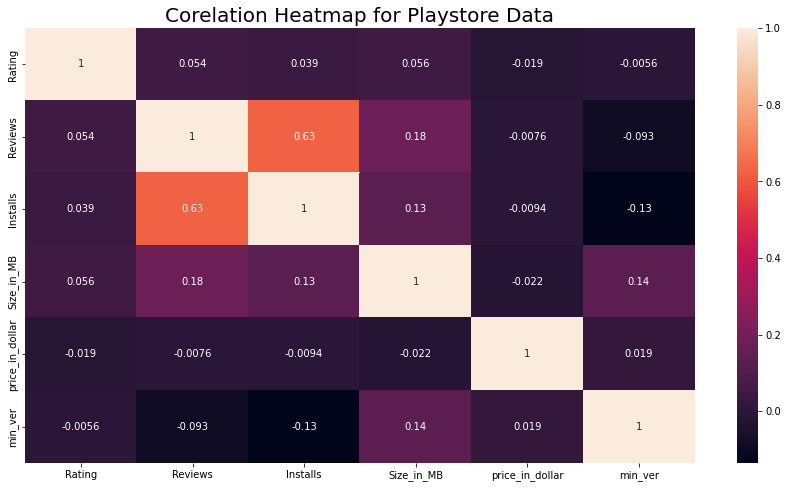

In [ ]:
# Heat map for play_store
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

## **Observation**:

* There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
* The Price is slightly negatively correlated with the Rating, Reviews, and Installs.` This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
* The Rating is slightly positively correlated with the Installs and Reviews` column. This indicates that as the average user rating increases, the app installs and number of reviews also increase.

## Let us check if there is any co-relation in both the dataframes.

In [ ]:
merged_df = pd.merge(df, r_df, on='App', how = "inner")


In [ ]:
def merged_dfinfo():
  temp = pd.DataFrame(index=merged_df.columns)
  temp['data_type'] = merged_df.dtypes
  temp["count of non null values"] = merged_df.count()
  temp['NaN values'] = merged_df.isnull().sum()
  temp['% NaN values'] =merged_df.isnull().mean()
  temp['unique_count'] = merged_df.nunique() 
  return temp
merged_dfinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,35929,0,0.000000,816
Category,object,35929,0,0.000000,33
Rating,float64,35929,0,0.000000,22
Reviews,int64,35929,0,0.000000,807
Size,object,35929,0,0.000000,168
Installs,int64,35929,0,0.000000,12
Type,object,35929,0,0.000000,2
Price,object,35929,0,0.000000,9
Content Rating,object,35929,0,0.000000,5
Genres,object,35929,0,0.000000,67


In [ ]:
merged_df.corr()

,Rating,Reviews,Installs,Size_in_MB,price_in_dollar,min_ver,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.075736,0.020145,0.167536,-0.010055,-0.051343,0.092903,0.068758
Reviews,0.075736,1.000000,0.564256,0.430136,-0.020591,-0.098488,-0.080021,-0.009315
Installs,0.020145,0.564256,1.000000,0.213743,-0.025213,-0.211734,-0.057842,-0.006307
Size_in_MB,0.167536,0.430136,0.213743,1.000000,-0.019786,0.125560,-0.159388,0.009183
price_in_dollar,-0.010055,-0.020591,-0.025213,-0.019786,1.000000,0.038220,0.024148,0.003182
min_ver,-0.051343,-0.098488,-0.211734,0.125560,0.038220,1.000000,-0.016333,0.007466
Sentiment_Polarity,0.092903,-0.080021,-0.057842,-0.159388,0.024148,-0.016333,1.000000,0.259668
Sentiment_Subjectivity,0.068758,-0.009315,-0.006307,0.009183,0.003182,0.007466,0.259668,1.000000


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

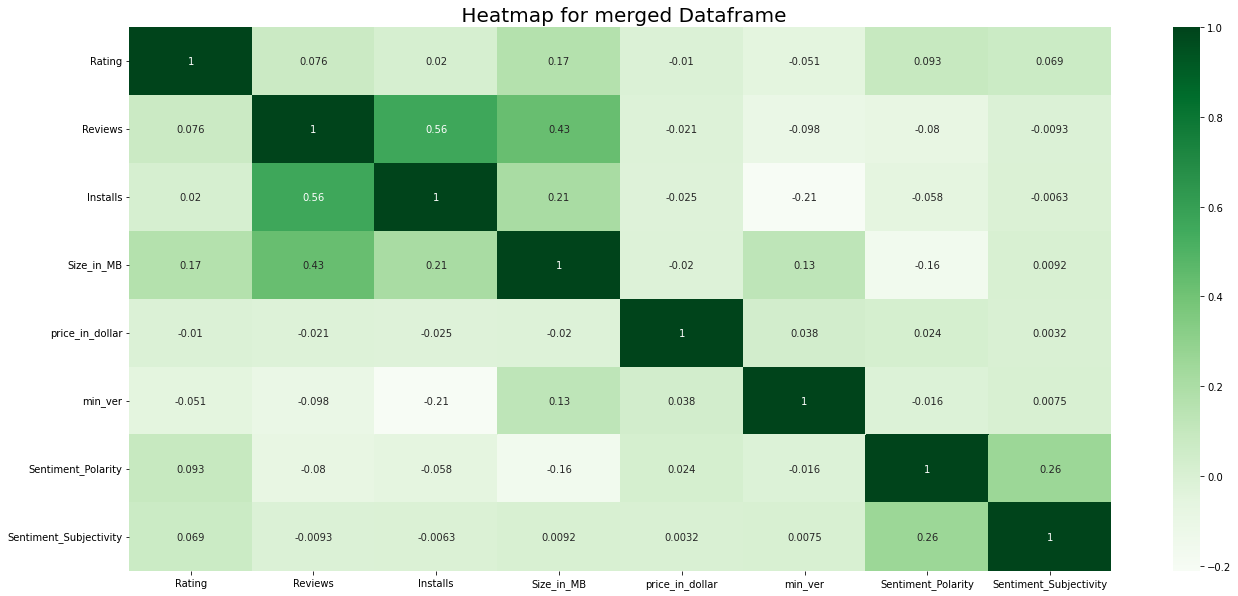

In [ ]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.rcParams['figure.figsize'] = (22, 10)
sns.heatmap(merged_df.corr(), annot= True, cmap='Greens')
plt.title(' Heatmap for merged Dataframe', size=20)

## Q2-What is the ratio of number of Paid apps and Free apps?

In [ ]:
data = df['Type'].value_counts() 
labels = ['Free', 'Paid']

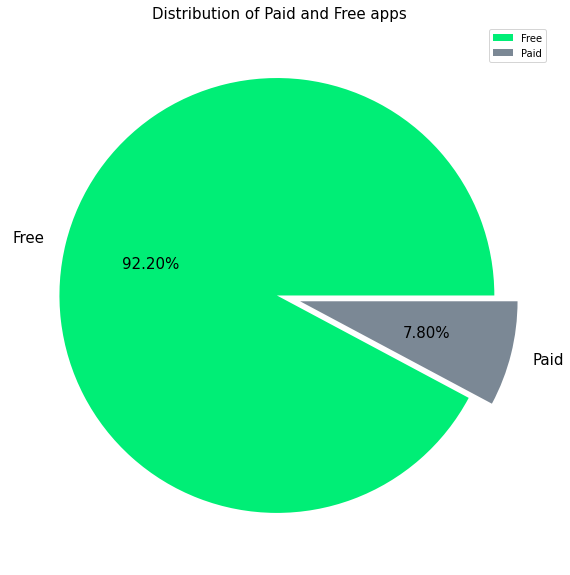

In [ ]:

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

**Observation:**

From the above graph we can see that 92% of apps in google play store are free and 8% are paid.

# Q3-Distribution of apps in terms of rating

###Distribution of rating coloumn

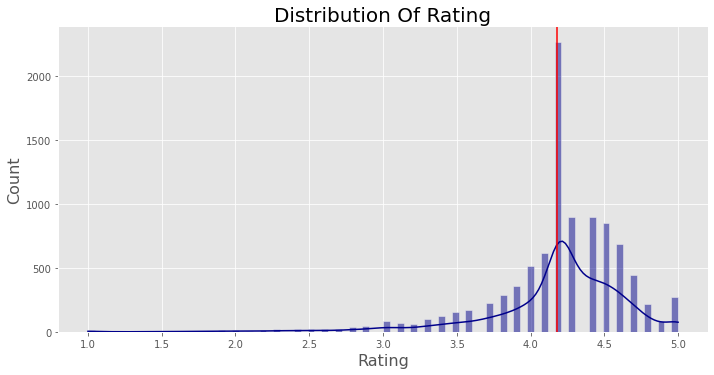

In [ ]:
#first check the distribution of the rating coloumn
plt.style.use('ggplot')
sns.displot(data=df["Rating"],kde = True,height=5, aspect=2,color="darkblue")
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Distribution Of Rating", fontsize = 20)
plt.axvline(x=df["Rating"].mean(),color='red')

### Observations


*   Most of the apps are rated between 4.0 to 4.6
*   The average rating is close to 4.2



###Number of apps in terms of ratings

In [ ]:
#function to create color map list
def colormap():
  '''this function will return a color_list that as per the values of the df_rating_dist['Ratings'] series used for the color coding of 
     the bar chart representing df_rating_dist['Ratings'] series '''
  color_list=[]
  for i,item in df_rating_dist['Ratings'].iteritems():
    if item>=4:
      color_list.append("blue")
    elif item<4 and item>=3:
      color_list.append("yellow")
    else:
      color_list.append("red")
  return color_list





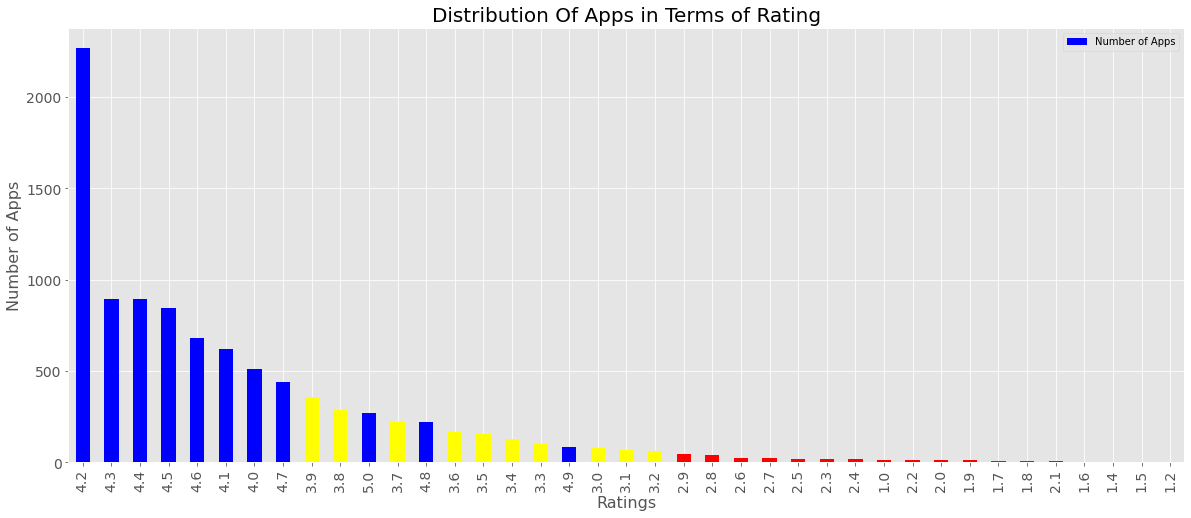

In [ ]:
# bar chart for Number of apps with different ratings
df_rating_dist=df["Rating"].value_counts().reset_index().sort_values(by=['Rating'],ascending=False)
df_rating_dist.rename(columns = {'index':'Ratings', 'Rating':'Number of Apps',
                              }, inplace = True)
plt.style.use('ggplot')
bar=df_rating_dist.plot.bar(figsize=(20,8),x='Ratings',y='Number of Apps',color=colormap());
plt.xlabel("Ratings", fontsize = 16)
plt.ylabel("Number of Apps", fontsize = 16)
plt.title("Distribution Of Apps in Terms of Rating", fontsize = 20)
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);




### Observations


*   Most number of app is rated with the rating 4.2,followed the rateings 4.3, 4.4, 4.5 respectively
*   Blue bars representing the apps rated with 4.0 or above  contains the highest numbers of apps, followed by the yellow bars representing the apps rated between [3.0 to 4.0], followed by the red bars representing the apps rated bellow 3.0  



###percentge distribution of top rated apps vs average rated apps vs low rated apps

In [ ]:
#function to group the rating coloumn in 3 category
def app_dist(item):
  '''function to convert the rateing column into 3 category'''
  if item>=4:
      return "top-rated apps"
  elif item<4 and item>=3:
      return "average-rated apps"
  else:
      return "low-rated apps"

In [ ]:
#number of apps in terms of rating category 
df_app_dist=df['Rating'].apply(lambda x:app_dist(x)).value_counts().reset_index()
df_app_dist.rename(columns = { 'index':'Rating category','Rating':'Percentage of Apps',
                              }, inplace = True)
df_app_dist = df_app_dist.set_index('Rating category')
df_app_dist

,Percentage of Apps
Rating category,
top-rated apps,7739
average-rated apps,1630
low-rated apps,279


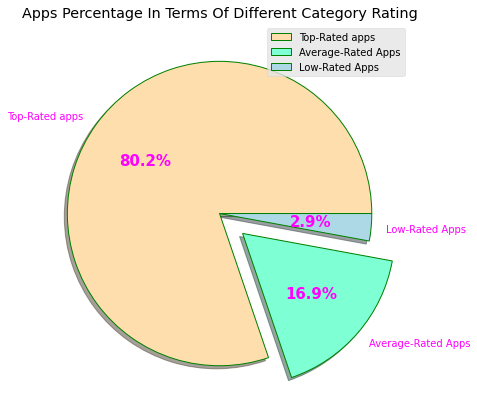

In [ ]:
#pie chart for parcentage distribution of ratteing of the apps
explode = (0, 0.2, 0)
labels = 'Top-Rated apps', 'Average-Rated Apps', 'Low-Rated Apps',
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts=ax.pie(data=df_app_dist,x='Percentage of Apps',labels=labels,autopct='%1.1f%%',shadow=True,explode=explode,colors=['navajowhite','aquamarine','lightblue'],wedgeprops = wp,textprops = dict(color ="magenta"))
plt.setp(autotexts, size = 15, weight ="bold")
plt.legend( loc=1)
ax.set_title("Apps Percentage In Terms Of Different Category Rating");


### observations


*   80.2% apps are top rated app(4.0 or above)
*   16.9% apps are average rated app(3.0 to 3.9)
*   2.9% apps are low rated app(1 to 2.9)









# Q4- Total number of app in each category.

In [ ]:
# Creating temperory dataset which contain unique categories and no of apps in that category.
cat_df = df.groupby('Category')['App'].count().sort_values(ascending = False).reset_index()

In [ ]:
# Plotting Bar graph.
fig =px.bar(cat_df,x= 'Category',y= 'App',labels={'App':'Number of Apps'},text_auto=True)
fig.update_layout(title_text='Number of Apps in each Category', title_x=0.5,titlefont=dict(size =22, color='black', family='Arial, sans-serif'))

fig.show()

## **Observation:**
### As we can see most number of apps in the Playstore are of **Family** category followed by **Game** and **Tools** category.
### **Beauty** and **Comics** category has least number of apps.

# Q5- Most apps in terms of content rating

In [ ]:
# Most apps in terms of Content Rating

df.groupby(['Content Rating'])['App'].count().reset_index()


,Content Rating,App
0,Adults only 18+,3
1,Everyone,7893
2,Everyone 10+,321
3,Mature 17+,393
4,Teen,1036
5,Unrated,2


In [ ]:
ax = df['Content Rating'].value_counts()
ax

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 0, 'Content Rating')

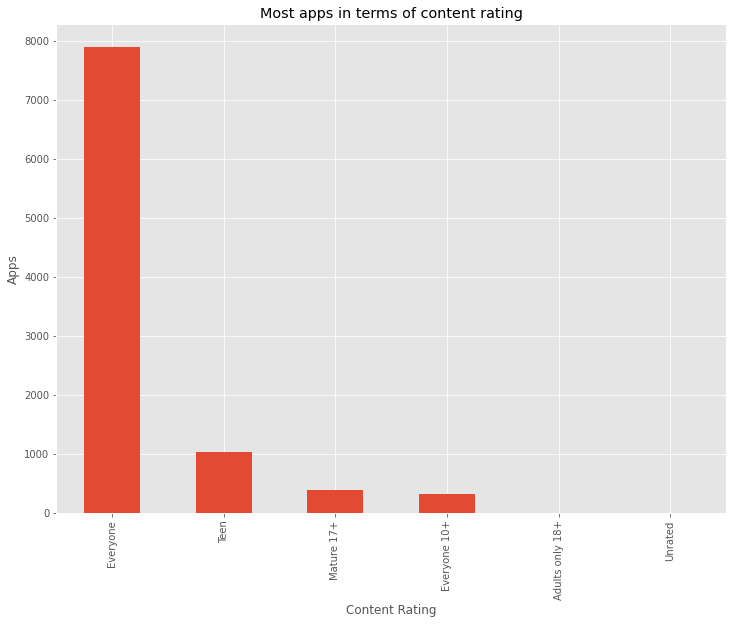

In [ ]:
plt.figure(figsize=(12,9))
ax.plot(kind='bar')
plt.title('Most apps in terms of content rating')
plt.ylabel('Apps')
plt.xlabel('Content Rating')

In [ ]:
# Plotting Content Rating using Pie-Chart.

fig = px.pie(df['Content Rating'] , names='Content Rating' , color='Content Rating')
fig.update_layout(title_text='Content Rating percentage wise',title_x=0.5,titlefont=dict(size=30,color='black',family='Arial , Halvetica'))
fig.show()

## **Observation**:
There are around 8000 apps whose content is available for everyone which comes up to 81.8% of the total apps.


# Q6 - Top 10 categories in terms of number of installs

In [ ]:
# Top 10 categories in number of installs

top_categories = df.groupby('Category')['Installs'].count().sort_values(ascending=False).head(10)
top_categories

Category
FAMILY             1828
GAME                959
TOOLS               825
BUSINESS            420
MEDICAL             395
PERSONALIZATION     374
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: Installs, dtype: int64

Text(0.5, 0, 'Category')

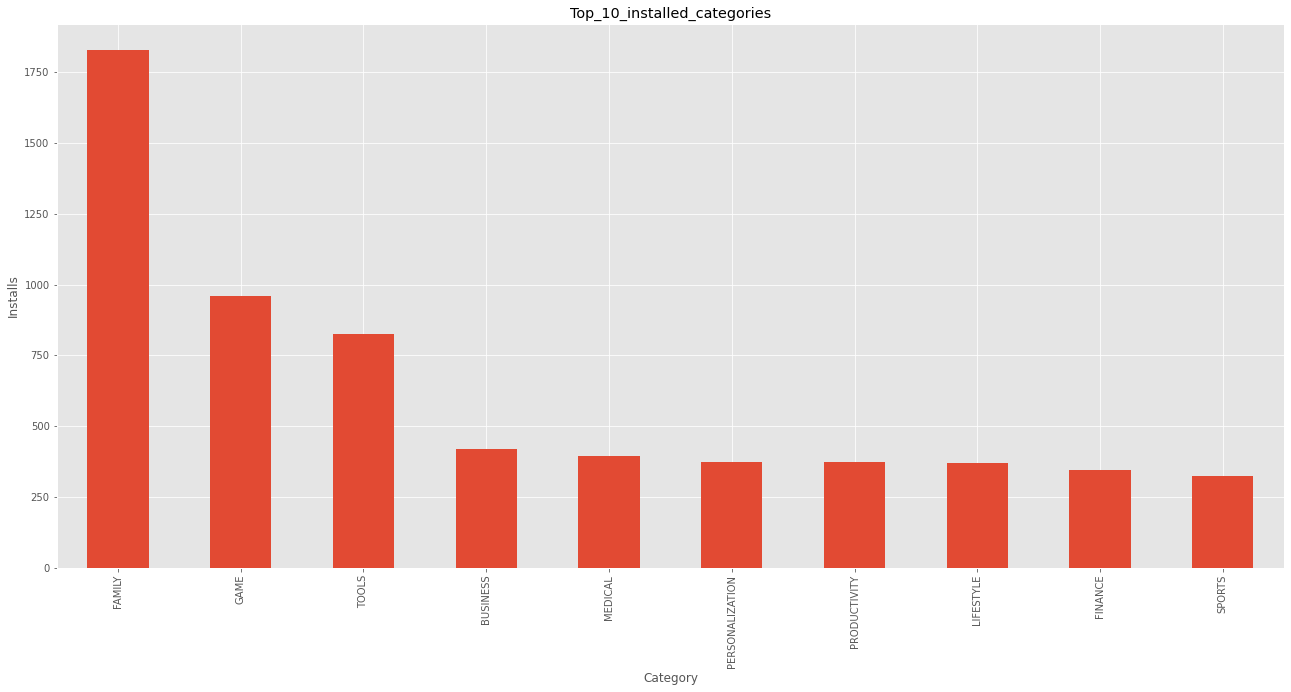

In [ ]:
# Bar graph for top 10 categories in terms of number of installs
top_categories.plot(kind='bar')
plt.title("Top_10_installed_categories")
plt.ylabel('Installs')
plt.xlabel('Category')

## **Observation:**

In the playstore , the top 10 categories are **FAMILY**,**GAME**,**TOOLS**,**BUSINESS**,**MEDICAL**,**PERSONALIZATION**,**PRODUCTIVITY**,**LIFESTYLE**,**FINANCE**,**SPORTS**.

# Q7-Top 10 apps of Free Type.

In [ ]:
# Dataframe of free type apps.
free_df=df[df['Type']=='Free']

In [ ]:
# Top 10 free app by installs.
free_df[['App','Installs']].sort_values(by='Installs',ascending=False).head(10)

,App,Installs
2928,Google Play Movies & TV,1000000000
1354,Subway Surfers,1000000000
303,Gmail,1000000000
301,Google Chrome: Fast & Secure,1000000000
299,WhatsApp Messenger,1000000000
298,Messenger – Text and Video Chat for Free,1000000000
2189,Google Photos,1000000000
2906,YouTube,1000000000
700,Google Play Games,1000000000
2418,Maps - Navigate & Explore,1000000000


# Q8- Top 10 apps of Paid type.

Paid apps can be classified on the basis of **revenue** they generated and not by number of installs.

In [ ]:
# Creating Revenue column.
df['Revenue']= df['Installs']*df['price_in_dollar']

In [ ]:
# Top apps of Paid type.
top_paid_df= df[df['Type']=='Paid'].sort_values(by='Revenue',ascending=False)


In [ ]:
 # Top 10 Paid apps.
top_10_paid_apps=top_paid_df[['App','Revenue']].head(10)

In [ ]:
# PLotting Bar graph for top 10 paid apps.
fig = px.bar(top_10_paid_apps,x='App',y='Revenue',color= 'App',text_auto=True)
fig.update_layout(title_text='Top 10 apps in Paid Type by Revenue', title_x=0.5,titlefont=dict(size =22, color='black', family='Arial, sans-serif'))
fig.show()

## **Observation:**
App which has generated most revenue through download is **Minecraft** making **$69.9Millions**.

# Q9-Number of apps based on size

In [ ]:
# Number of apps based on size

Number_of_apps = df.groupby(['Size_in_MB'])['App'].count().reset_index()
Number_of_apps

,Size_in_MB,App
0,0.0,27
1,0.1,34
2,0.2,47
3,0.3,32
4,0.4,29
...,...,...
186,96.0,23
187,97.0,11
188,98.0,13
189,99.0,30


In [ ]:
def func(x):
  ''' Function to get the size of the app'''
  if (x <= 30):
    return "Small Size"
  elif(x >= 30) & (x <= 60):
    return "Medium Size"
  else:
    return "Large Size"

df['App'] = df['Size_in_MB'].apply(func)
df.dropna(subset=['Size'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,price_in_dollar,min_ver
0,Small Size,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,0.0,4.0
1,Small Size,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,0.0,4.0
2,Small Size,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,0.0,4.0
3,Small Size,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0,0.0,4.2
4,Small Size,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,0.0,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Medium Size,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up,53.0,0.0,4.1
9644,Small Size,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up,3.6,0.0,4.1
9645,Small Size,MEDICAL,4.2,3,9.5M,1000,Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up,9.5,0.0,2.2
9646,Large Size,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,NaN,0.0,1.0


In [ ]:
# Number of apps based on size
bx = df.groupby(['App'])['Size_in_MB'].count()
bx

App
Large Size      600
Medium Size    1301
Small Size     6521
Name: Size_in_MB, dtype: int64

Text(0.5, 0, '( SIZE )')

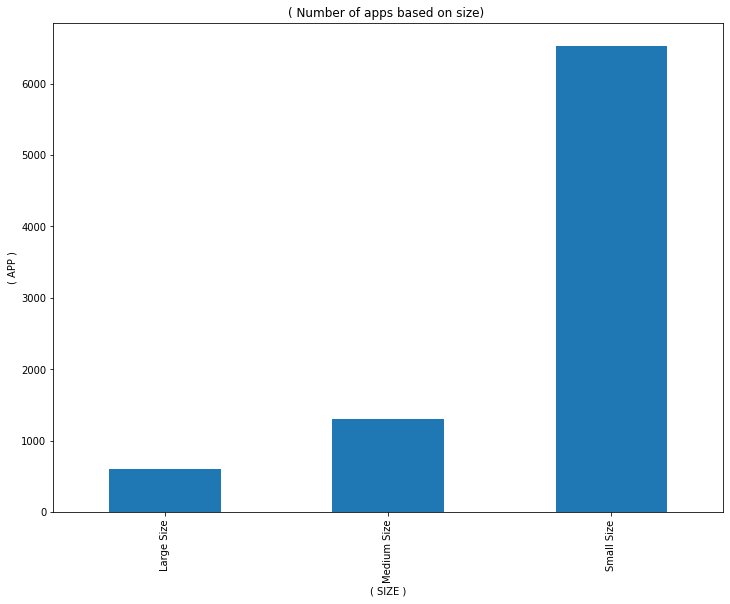

In [ ]:
# Plotting graph for number of apps based on size
plt.figure(figsize=(12,9))
bx.plot(kind='bar')
plt.title('( Number of apps based on size) ')
plt.ylabel('( APP )')
plt.xlabel('( SIZE )')

In [ ]:
# Plotting size-wise apps by using pie-chart
fig = px.pie(df['App'] , names='App' , color='App')
fig.update_layout(title_text='Number of apps based on size', title_x=0.5,titlefont=dict(size=30,color='black',family= 'Arial,Halvetica'))
fig.show()


## **Observation**

By going through the aforementioned size data ,we observe that most apps are based on **Small Size(67.6%)**, followed by **Medium Size(18.9%)** and **Large Size(13.5%)**.

# Q10-Number of apps in each category type wise(Free & Paid).

In [ ]:
type_df = df.groupby(['Category','Type'])['App'].count().reset_index()
type_df

,Category,Type,App
0,ART_AND_DESIGN,Free,60
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,159
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,71


In [ ]:
# Top Category of Free type.
type_df[type_df['Type']=='Free'].sort_values(by='App',ascending=False).head(2)

,Category,Type,App
20,FAMILY,Free,1646
26,GAME,Free,877


In [ ]:
# Top Category of Paid type.
type_df[type_df['Type']=='Paid'].sort_values(by='App',ascending=False).head(2)

,Category,Type,App
21,FAMILY,Paid,182
38,MEDICAL,Paid,83


In [ ]:
# Category with least number of apps in Free type.
type_df[type_df['Type']=='Free'].sort_values(by='App',ascending=False).tail(2)

,Category,Type,App
9,COMICS,Free,56
4,BEAUTY,Free,53


In [ ]:
# Category with least number of apps in Paid type.
type_df[type_df['Type']=='Paid'].sort_values(by='App',ascending=False).tail(2)

,Category,Type,App
32,LIBRARIES_AND_DEMO,Paid,1
19,EVENTS,Paid,1


In [ ]:
fig = px.bar(type_df, x='App', y='Category', color='Type',text_auto=True,height=800,labels={'App':'Number of Apps'})
fig.update_layout(title_text='Number of Apps in Each Category type wise', title_x=0.5,titlefont=dict(size =22, color='black', family='Arial, sans-serif'))
fig.show()

## **Observation:**
In playstore **Family** category has most number of apps in both Free and Paid types.1646 in Free type and 182 in Paid type.
**Comics** and **Beauty** have least number of apps in Free type which is 56 and 53.
In paid type **Libraries And Demo** and **Event** contains only 1 app.

# Q11-Percentage of Review Sentiments.

In [ ]:
# Plotting user sentiments using pie chart.
fig=px.pie(r_df['Sentiment'],names='Sentiment',color='Sentiment')
fig.update_layout(title_text='Sentiments percentage wise', title_x=0.5,titlefont=dict(size =22, color='black', family='Arial, sans-serif'))
fig.show()

## **Observation:**
Reviews obtained from customers about playstore apps **64.1%** are of **Positive** sentiment followed  by **Negative** review which is **22.1%** and **13.8%** reviews are of **Neutral** type.


#Q12-Distribution of sentiment subjectivity

In [ ]:
# Checking Value Counts of Sentiment_Subjectivity
r_df['Sentiment_Subjectivity'].value_counts()

0.000000    4411
1.000000    1749
0.500000    1647
0.600000    1166
0.750000    1140
            ... 
0.616909       1
0.234848       1
0.154762       1
0.591146       1
0.259470       1
Name: Sentiment_Subjectivity, Length: 4474, dtype: int64

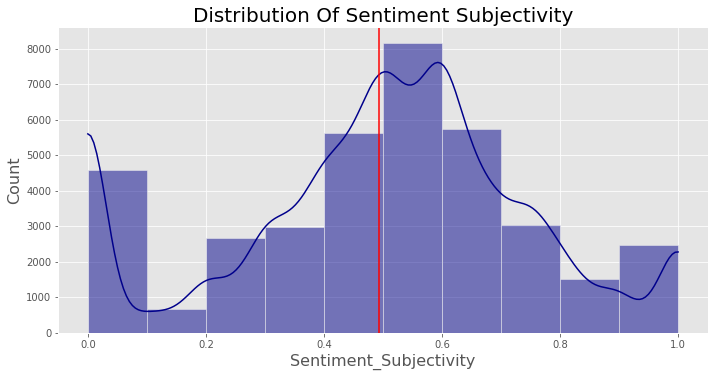

In [ ]:
#Distribution of sentiment subjectivity
plt.style.use('ggplot')
sns.displot(data=r_df['Sentiment_Subjectivity'],kde = True,height=5, aspect=2,color="darkblue",bins=10)
plt.xlabel("Sentiment_Subjectivity", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Distribution Of Sentiment Subjectivity", fontsize = 20)
plt.axvline(x=r_df["Sentiment_Subjectivity"].mean(),color='red')

## **Observations:**


*   The Sentiment Subjectivity of maximum reviews lies between 0.4 to 0.7. Average Sentiment Subjectivity is close to 0.5. 
*   It indicates that maximum of the reviews are subjective, close to the opinion of general public

